### Importing required packages.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from collections import Counter
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
wine = pd.read_csv('winequality-red.csv')

In [22]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [23]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 149.9 KB


### Charts and plots

<Figure size 720x432 with 0 Axes>

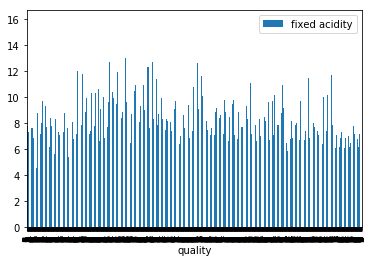

In [24]:
fig = plt.figure(figsize = (10,6))
wine.plot.bar(x='quality', y='fixed acidity')
plt.show()

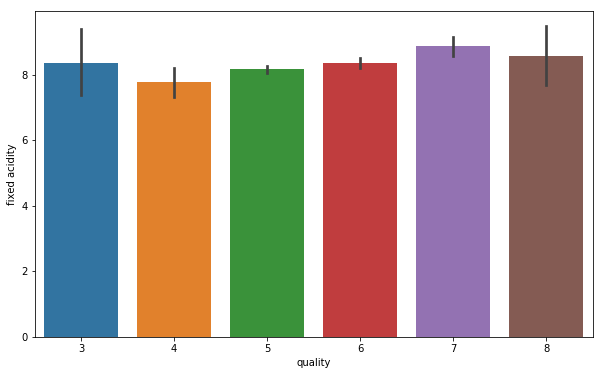

In [26]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine)

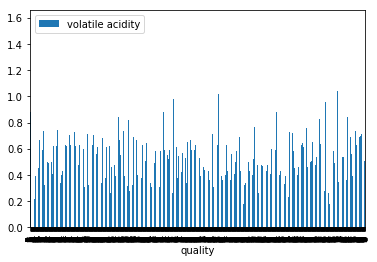

In [27]:
wine.plot(kind = 'bar', x = 'quality', y = 'volatile acidity')
plt.show()

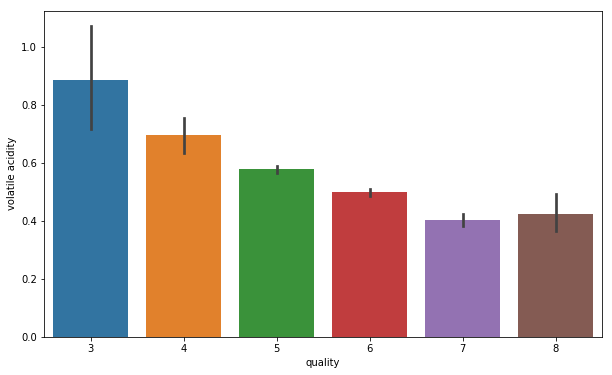

In [28]:
fig2 = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)

### Let's create new column for wine classification

In [59]:
reviews = []
for i in wine['quality']:
    if i >= 2 and i < 6.5:
        reviews.append('0')
    elif i >= 6.5 and i <= 8:
        reviews.append('1')
wine['Reviews'] = reviews

In [60]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Reviews'],
      dtype='object')

In [61]:
Counter(wine['Reviews'])

Counter({'0': 1382, '1': 217})

In [62]:
label_quality = LabelEncoder()

In [63]:
wine['Reviews'] = label_quality.fit_transform(wine['Reviews'])

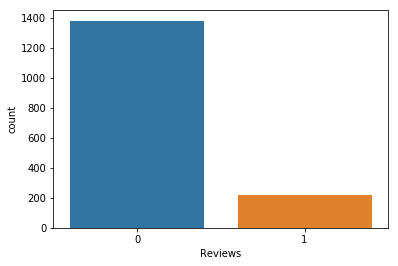

In [64]:
sns.countplot(wine['Reviews'])

### What is the correlation between variables?

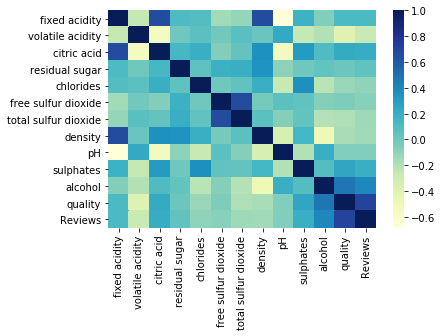

In [65]:
sns.heatmap(wine.corr(), cmap="YlGnBu")
plt.show()

In [45]:
category = pd.DataFrame(data=reviews, columns=["Reviews"])
data = pd.concat([wine, category], axis=1)
data.drop(columns="quality", axis=1, inplace=True)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2018)

### Building models

In [47]:
skf = StratifiedKFold(n_splits=4)

In [48]:
pipe_svm = Pipeline([('clf', svm.SVC())])
grid_params = dict(clf__C=[0.1, 0.3, 1, 3, 10],
                   clf__gamma=[0.1, 0.3, 1, 3, 10],
                   clf__kernel=['rbf', 'sigmoid'])
gs_svm = GridSearchCV(estimator=pipe_svm,
                      param_grid=grid_params,
                      scoring='accuracy',
                      cv=skf)
gs_svm.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('clf', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'clf__C': [0.1, 0.3, 1, 3, 10], 'clf__gamma': [0.1, 0.3, 1, 3, 10], 'clf__kernel': ['rbf', 'sigmoid']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

### Results

In [49]:
print(gs_svm.best_score_)

0.706020328381548


In [53]:
sc = StandardScaler()

In [54]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [55]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [57]:
print(classification_report(y_test, pred_rfc))


              precision    recall  f1-score   support

           0       0.79      0.68      0.73       161
           1       0.71      0.82      0.76       159

   micro avg       0.75      0.75      0.75       320
   macro avg       0.75      0.75      0.75       320
weighted avg       0.75      0.75      0.75       320

